In [9]:
import pandas as pd
movie_df = pd.read_csv('movies_data_processed.csv')
movie_df.head()


,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.042498,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.417608,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail


In [10]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4996 non-null   object 
 1   genres        4996 non-null   object 
 2   type          4996 non-null   object 
 3   rating        4863 non-null   float64
 4   no_of_votes   4863 non-null   float64
 5   meta_score    2143 non-null   float64
 6   release_date  4946 non-null   float64
 7   gross         2084 non-null   float64
 8   budget        1805 non-null   float64
 9   countries     4969 non-null   object 
 10  url           4996 non-null   object 
 11  ROI           1612 non-null   float64
 12  result        4996 non-null   object 
dtypes: float64(7), object(6)
memory usage: 507.5+ KB


In [11]:
movie_df = movie_df.dropna(subset=['budget', 'gross'])
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1612 entries, 1 to 4995
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1612 non-null   object 
 1   genres        1612 non-null   object 
 2   type          1612 non-null   object 
 3   rating        1612 non-null   float64
 4   no_of_votes   1612 non-null   float64
 5   meta_score    1558 non-null   float64
 6   release_date  1612 non-null   float64
 7   gross         1612 non-null   float64
 8   budget        1612 non-null   float64
 9   countries     1612 non-null   object 
 10  url           1612 non-null   object 
 11  ROI           1612 non-null   float64
 12  result        1612 non-null   object 
dtypes: float64(7), object(6)
memory usage: 176.3+ KB


In [12]:
movie_df.describe()

,rating,no_of_votes,meta_score,release_date,gross,budget,ROI
count,1612.000000,1.612000e+03,1558.000000,1612.000000,1.612000e+03,1.612000e+03,1612.000000
mean,7.028660,2.663650e+05,64.299743,2002.679901,1.818190e+08,4.902255e+07,4.551094
std,0.869989,3.514505e+05,16.658823,18.266746,2.884366e+08,5.671486e+07,14.351137
min,2.800000,8.050000e+02,10.000000,1925.000000,1.900000e+01,3.000000e+04,-0.999983
25%,6.500000,5.900000e+04,52.000000,1994.000000,2.229385e+07,1.150000e+07,0.107132
50%,7.100000,1.420000e+05,65.000000,2007.000000,7.142511e+07,2.700000e+07,1.689598
75%,7.600000,3.177500e+05,76.000000,2016.000000,2.127947e+08,6.800000e+07,4.276975
max,9.300000,3.000000e+06,100.000000,2025.000000,2.923711e+09,4.149000e+08,316.627031


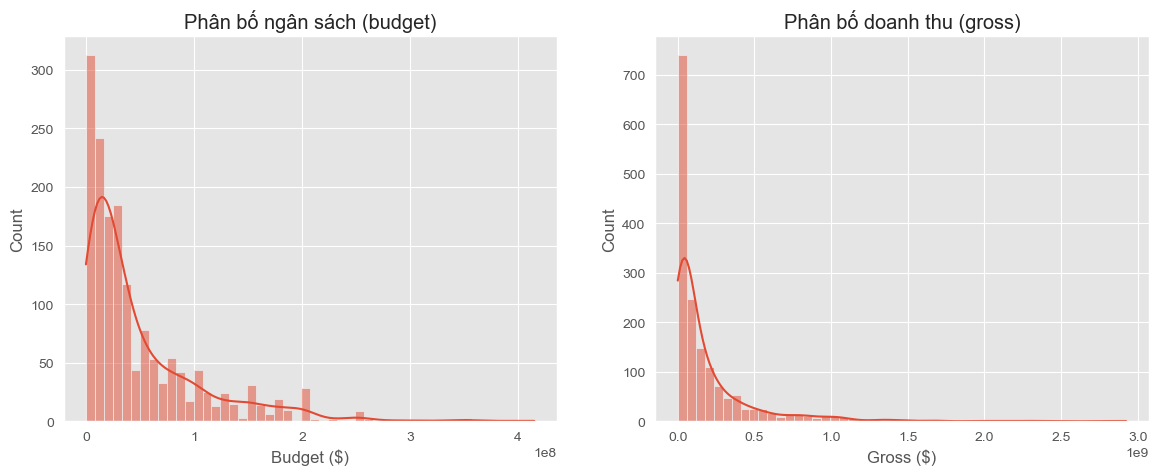

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(movie_df["budget"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Phân bố ngân sách (budget)")
axes[0].set_xlabel("Budget ($)")

sns.histplot(movie_df["gross"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Phân bố doanh thu (gross)")
axes[1].set_xlabel("Gross ($)")
plt.show()

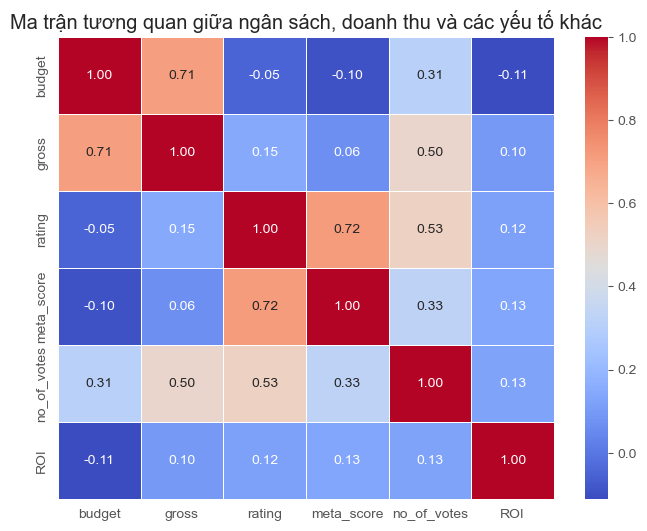

In [14]:
# Ma trận tương quan giữa các biến liên quan
correlation_matrix = movie_df[["budget", "gross", "rating", "meta_score", "no_of_votes", "ROI"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan giữa ngân sách, doanh thu và các yếu tố khác")
plt.show()

Ngân sách (budget) và doanh thu (gross) có tương quan cao (~0.74) liệu phim có ngân sách cao thường có khả năng thu nhiều tiền hơn?

Ngân sách (budget) và điểm đánh giá (rating, meta_score) có tương quan thấp (~0.05 và -0.1), cho thấy phim có ngân sách cao không đồng nghĩa với điểm đánh giá cao.

Lượt đánh giá (no_of_votes) có tương quan mạnh với điểm rating (~0.53), nghĩa là phim được nhiều người quan tâm thường có điểm đánh giá ổn định.

ROI có tương quan thấp với ngân sách nhưng âm với gross (~-0.32), điều này có thể do phim có doanh thu lớn nhưng chi phí sản xuất cũng cao, làm giảm tỷ suất lợi nhuận.

Gross có tương quan mạnh với no_of_votes (~0.5), điều này có thể do phim được nhiều người xem thì doanh thu cũng cao.

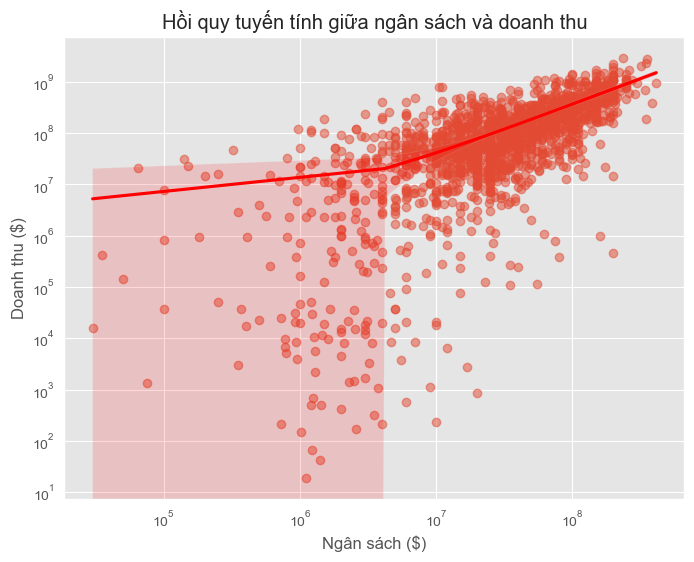

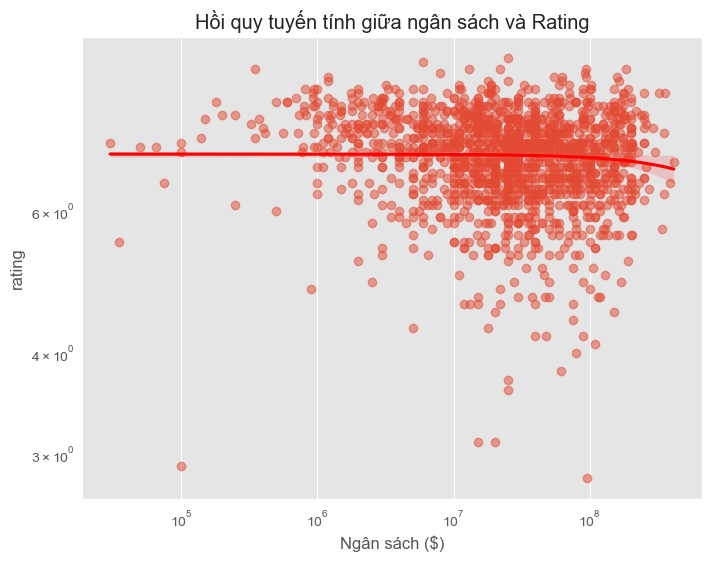

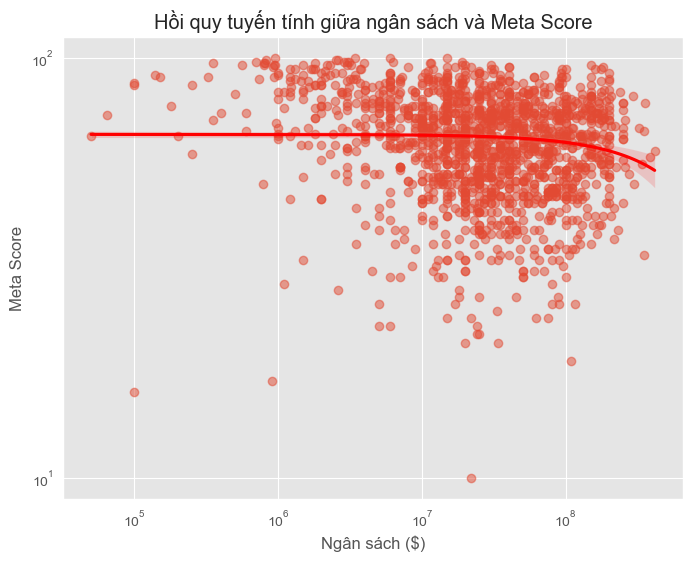

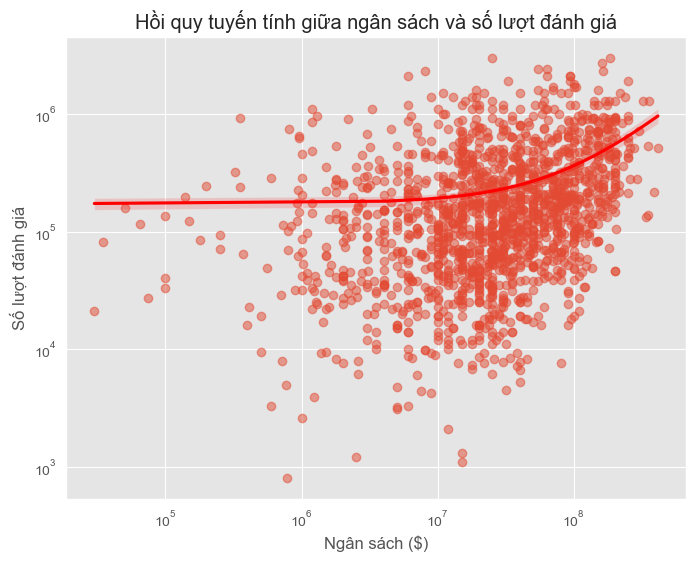

In [17]:

def plot_scatter(df, x, y , title,x_label , y_label):
    plt.figure(figsize=(8,6))
    sns.regplot(x=df[x], y=movie_df[y], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

plot_scatter(movie_df, "budget", "gross", "Hồi quy tuyến tính giữa ngân sách và doanh thu", "Ngân sách ($)", "Doanh thu ($)")
plot_scatter(movie_df, "budget", "rating", "Hồi quy tuyến tính giữa ngân sách và Rating", "Ngân sách ($)", "rating")
plot_scatter(movie_df, "budget", "meta_score", "Hồi quy tuyến tính giữa ngân sách và Meta Score", "Ngân sách ($)", "Meta Score")
plot_scatter(movie_df, "budget", "no_of_votes", "Hồi quy tuyến tính giữa ngân sách và số lượt đánh giá", "Ngân sách ($)", "Số lượt đánh giá")



Kiểm định t-test giữa ngân sách phim thành công và thất bại: t=5.45, p-value=0.00000
Kiểm định Mann-Whitney U giữa ngân sách phim thành công và thất bại: U=166227.00, p-value=0.55914


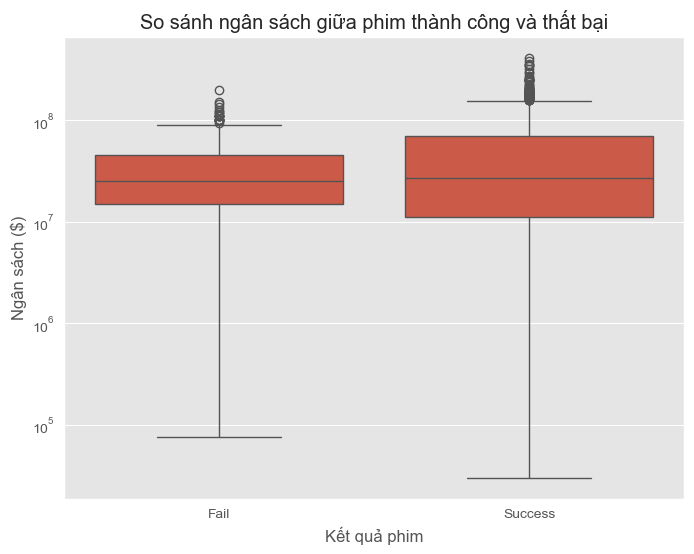

In [33]:
# 4. Phân tích mối quan hệ giữa ngân sách và kết quả phim
from scipy.stats import pearsonr, ttest_ind, mannwhitneyu
success_budget = movie_df[movie_df["result"] == "Success"]["budget"].dropna()
failure_budget = movie_df[movie_df["result"] == "Fail"]["budget"].dropna()

# So sánh trung bình ngân sách
t_stat, p_val = ttest_ind(success_budget, failure_budget, equal_var=False)
print(f"Kiểm định t-test giữa ngân sách phim thành công và thất bại: t={t_stat:.2f}, p-value={p_val:.5f}")

# Kiểm định phi tham số (Mann-Whitney U test)
u_stat, p_u_val = mannwhitneyu(success_budget, failure_budget)
print(f"Kiểm định Mann-Whitney U giữa ngân sách phim thành công và thất bại: U={u_stat:.2f}, p-value={p_u_val:.5f}")

# Vẽ biểu đồ boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="result", y="budget", data=movie_df)
plt.yscale("log")
plt.xlabel("Kết quả phim")
plt.ylabel("Ngân sách ($)")
plt.title("So sánh ngân sách giữa phim thành công và thất bại")
plt.show()

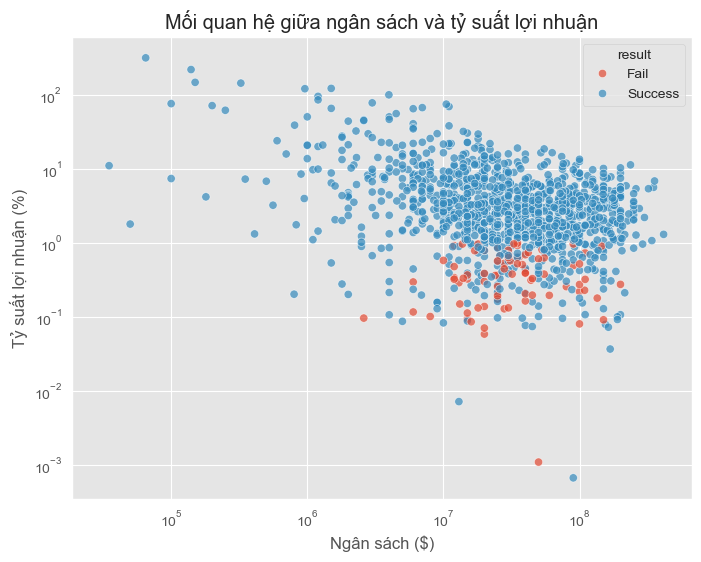

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="budget", y="ROI", data=movie_df, hue="result", alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Ngân sách ($)")
plt.ylabel("Tỷ suất lợi nhuận (%)")
plt.title("Mối quan hệ giữa ngân sách và tỷ suất lợi nhuận")
plt.show()

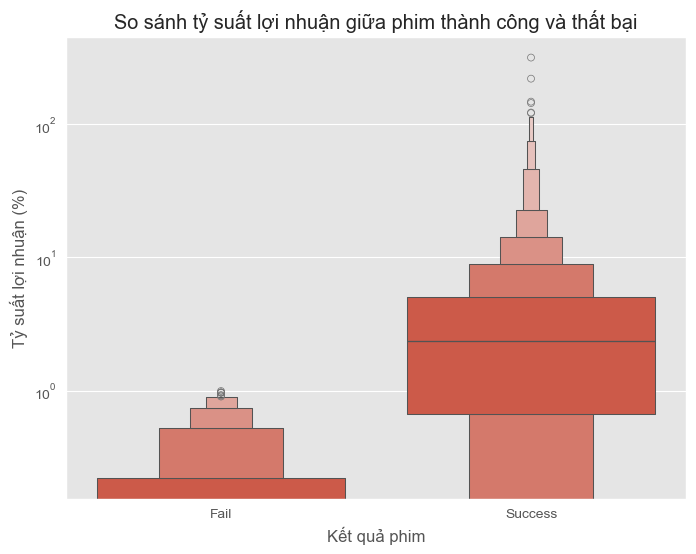

In [39]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x="result", y="ROI", data=movie_df)
plt.xlabel("Kết quả phim")
plt.ylabel("Tỷ suất lợi nhuận (%)")
plt.title("So sánh tỷ suất lợi nhuận giữa phim thành công và thất bại")
plt.yscale("log")
plt.show()